{'【综合科】': 1.9390581717451523,
 '【教学通知】': 2.21606648199446,
 '【教材中心】': 3.6011080332409975,
 '【计划科】': 4.43213296398892,
 '【教研教改】': 6.3711911357340725,
 '【质量办】': 11.911357340720222,
 '【教学运行】': 31.855955678670362,
 '【实践科】': 37.67313019390582,
 '通知人': '占比'}

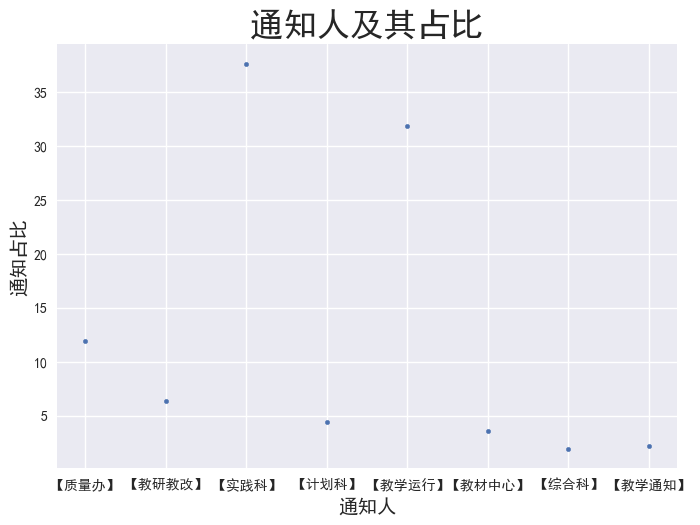

In [9]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'sans-serif'  
plt.rcParams['font.sans-serif'] = ['SimHei'] 
with open('附件数据分析.csv','r',encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
df = pd.read_csv('附件数据分析.csv')
df.name = '附件信息分析'
df.index.name = '附件序号'
df['有附件'] = df.有无附件 == '有附件'
del df['有无附件']
df = df[df['有附件']==True]
set1 = set(df['通知人'])
df = df.sort_values(by='附件下载次数')
df.index = np.arange(361)
d = {i:(df[df['通知人']==i]['通知人'].count())/361*100 for i in set1}
data = d.values()
x = d.keys()
fig,ax = plt.subplots()
ax.set_title('通知人及其占比',fontsize=24)
ax.set_xlabel('通知人',fontsize=14)
ax.set_ylabel('通知占比',fontsize=14)
ax.scatter(x,data,s=10)
d = dict(sorted(d.items(),key=lambda x:x[1]))
d['通知人']= '占比'
d

如图所示，通知人为x轴，其中占比教学运行和实践科最多

{'【教学通知】': 437.5,
 '【教材中心】': 797.8461538461538,
 '【质量办】': 825.6046511627907,
 '【综合科】': 854.1428571428571,
 '【教学运行】': 987.9826086956522,
 '【教研教改】': 1170.7826086956522,
 '【实践科】': 1449.9117647058824,
 '【计划科】': 1463.125,
 '通知人': '平均下载次数'}

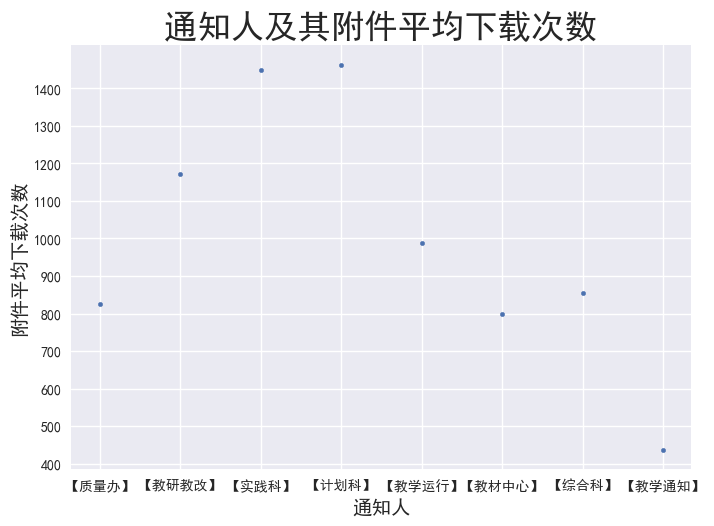

In [10]:
d1 = {i:((df[df['通知人']==i]['附件下载次数'].sum())/df[df['通知人']==i]['通知人'].count()) for i in set1}
data1 = d1.values()
x1 = d1.keys()
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'sans-serif'  
plt.rcParams['font.sans-serif'] = ['SimHei'] 
fig,ax = plt.subplots()
plt.yticks(range(1500)[::100])
ax.set_title('通知人及其附件平均下载次数',fontsize=24)
ax.set_xlabel('通知人',fontsize=14)
ax.set_ylabel('附件平均下载次数',fontsize=14)
ax.scatter(x1,data1,s=10)
d1 = dict(sorted(d1.items(),key=lambda x:x[1]))
d1['通知人'] = '平均下载次数'
d1

{'01': 20,
 '02': 16,
 '03': 31,
 '04': 41,
 '05': 45,
 '06': 32,
 '07': 9,
 '08': 29,
 '09': 27,
 '10': 18,
 '11': 39,
 '12': 54,
 '通知月份': '总通知次数'}

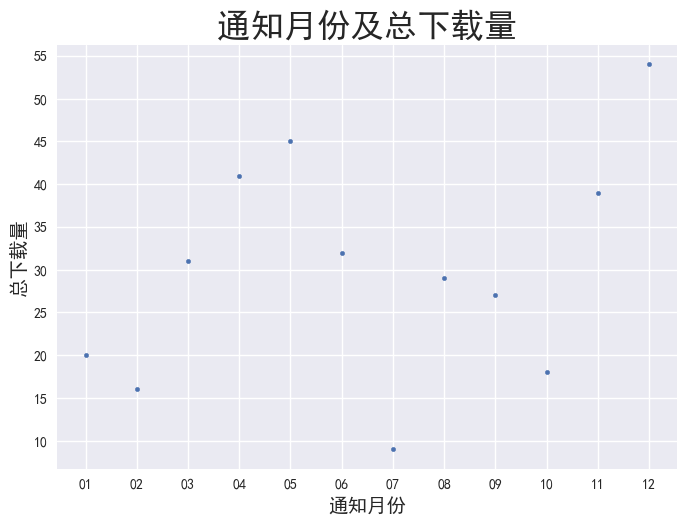

In [11]:
df2 = df['通知时间']
df['通知月份'] = df2.str[5:7]  
set2 = set(df['通知月份'])
d2 = {i:(df[df['通知月份']==i]['通知月份'].count()) for i in set2}
d2 = dict(sorted(d2.items()))
data2 = d2.values()
x2 = d2.keys()
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'sans-serif'  
plt.rcParams['font.sans-serif'] = ['SimHei'] 
fig,ax = plt.subplots()
plt.yticks(range(60)[::5])
ax.set_title('通知月份及总下载量',fontsize=24)
ax.set_xlabel('通知月份',fontsize=14)
ax.set_ylabel('总下载量',fontsize=14)
ax.scatter(x2,data2,s=10)
d2['通知月份'] = '总通知次数'
d2

总下载次数: 416496


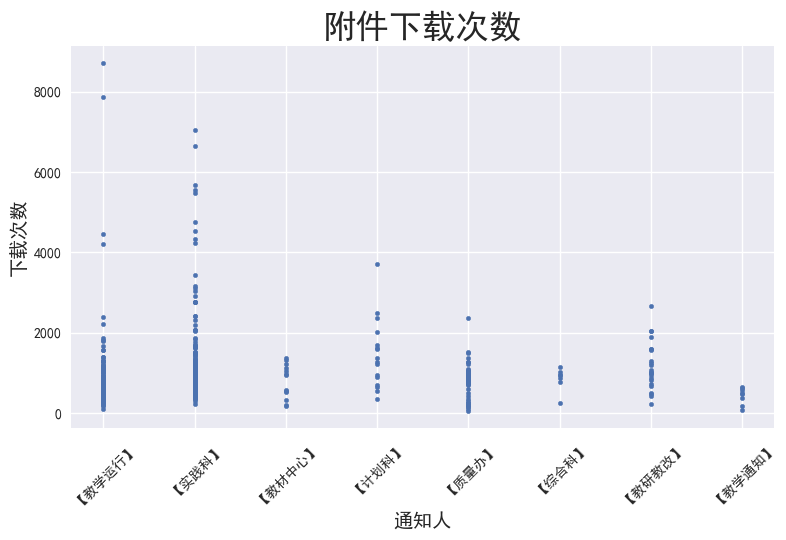

In [20]:
#研究各个通知人的附件下载次数
import pandas as pd
df = pd.read_csv('附件数据分析.csv')

# 统计有附件的记录  
attached_df = df[df['有无附件'] == '有附件']  
total_attachments = attached_df.shape[0]        # 附件数量  

print(f"总下载次数: {total_downloads}")  

plt.style.use('seaborn-v0_8')  
plt.rcParams['font.family'] = 'sans-serif'  
plt.rcParams['font.sans-serif'] = ['SimHei']   

# 绘制散点图  
fig, ax = plt.subplots()  
ax.set_title('附件下载次数', fontsize=24)  
ax.set_xlabel('通知人', fontsize=14)  
ax.set_ylabel('下载次数', fontsize=14)  

# 生成散点图数据  
ax.scatter(attached_df['通知人'], attached_df['附件下载次数'], s=10)  

# 显示图形  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


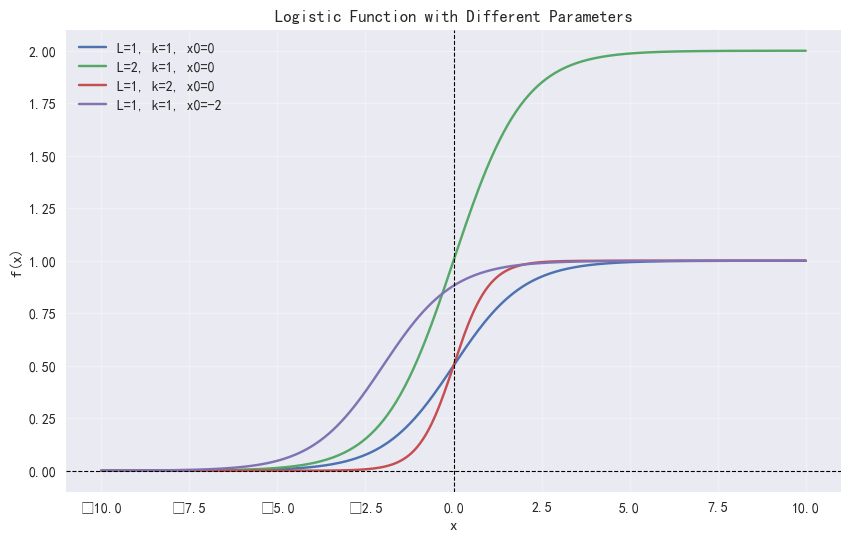

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 Logistic 函数
def logistic(x, L=1, k=1, x0=0):
    return L / (1 + np.exp(-k * (x - x0)))

# 定义 x 轴范围
x = np.linspace(-10, 10, 500)

# 不同参数设置
params = [
    {'L': 1, 'k': 1, 'x0': 0, 'label': 'L=1, k=1, x0=0'},
    {'L': 2, 'k': 1, 'x0': 0, 'label': 'L=2, k=1, x0=0'},
    {'L': 1, 'k': 2, 'x0': 0, 'label': 'L=1, k=2, x0=0'},
    {'L': 1, 'k': 1, 'x0': -2, 'label': 'L=1, k=1, x0=-2'}
]

# 绘制 Logistic 函数
plt.figure(figsize=(10, 6))
for param in params:
    y = logistic(x, L=param['L'], k=param['k'], x0=param['x0'])
    plt.plot(x, y, label=param['label'])

# 添加图例和标签
plt.title('Logistic Function with Different Parameters')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(alpha=0.3)

# 显示图像
plt.show()
